In [1]:
import pandas as pd

df = pd.read_csv('weather_condition_dataset.csv')

df.head()

,Temperature (°C),Snowfall (cm),Rainfall (mm),Weather Condition
0,-3.073824,29.087874,42.208425,0.163557
1,10.901377,45.877106,289.155699,0.421560
2,13.032862,45.075193,23.629117,0.682371
3,-6.564098,24.532275,275.678755,0.044280
4,19.291494,16.072447,181.462987,0.437489


In [2]:
df.columns

Index(['Temperature (°C)', 'Snowfall (cm)', 'Rainfall (mm)',
       'Weather Condition'],
      dtype='object')

In [5]:
df.isna().sum()

Temperature (°C)     0
Snowfall (cm)        0
Rainfall (mm)        0
Weather Condition    0
dtype: int64

In [6]:
#  Normalize numerical features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

# Display processed data
df.head()

,Temperature (°C),Snowfall (cm),Rainfall (mm),Weather Condition
0,0.125930,0.581758,0.140695,0.163559
1,0.380025,0.917543,0.963853,0.421568
2,0.418780,0.901505,0.078764,0.682385
3,0.062471,0.490646,0.918930,0.044280
4,0.532573,0.321449,0.604877,0.437497


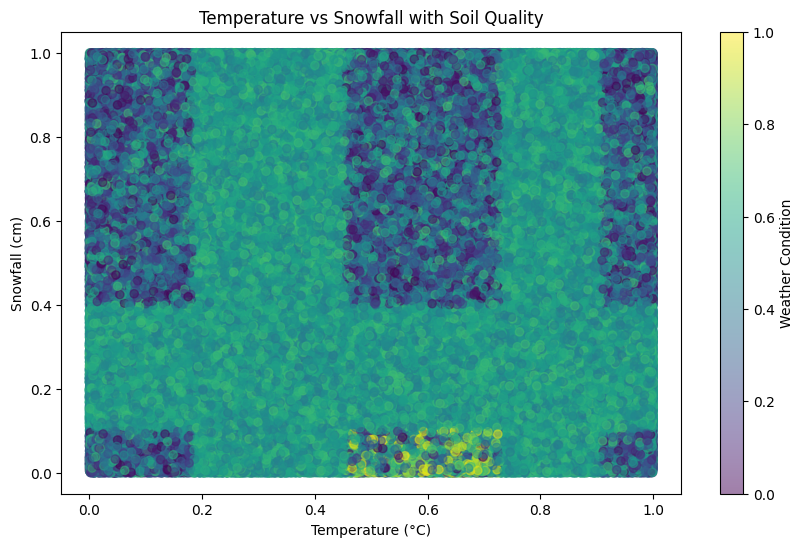

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df["Temperature (°C)"], df["Snowfall (cm)"], 
                      c=df["Weather Condition"], cmap="viridis", alpha=0.5)

plt.colorbar(label="Weather Condition")
plt.xlabel("Temperature (°C)")
plt.ylabel("Snowfall (cm)")
plt.title("Temperature vs Snowfall with Soil Quality")
plt.show()


In [10]:
df.corr()

,Temperature (°C),Snowfall (cm),Rainfall (mm),Weather Condition
Temperature (°C),1.000000,0.001036,0.000343,0.036679
Snowfall (cm),0.001036,1.000000,0.000607,-0.235464
Rainfall (mm),0.000343,0.000607,1.000000,0.123186
Weather Condition,0.036679,-0.235464,0.123186,1.000000


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=["Weather Condition"])  
y = df["Weather Condition"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [13]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=4)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.01
R² Score: 0.6968221604221971


In [14]:
xgb_model.fit(X, y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [15]:
import pickle

# Save the model to a pickle file
with open("Weather_Condition_From_Temp&Rain&Snow.pkl", "wb") as file:
    pickle.dump(xgb_model, file)

print("Model saved successfully!")


Model saved successfully!
